<a href="https://colab.research.google.com/github/shibinasalim/disseration_work/blob/main/dissertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
# loading the data from sklearn
breastcancer_dataset= sklearn.datasets.load_breast_cancer()

In [ ]:
#print the dataset
print(breastcancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
# loading the data to a pandas data frame
dataframe_breastcancer = pd.DataFrame(breastcancer_dataset.data, columns = breastcancer_dataset.feature_names)

In [ ]:
# print the first 5 rows of the dataframe
dataframe_breastcancer.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# adding the 'target' column to the data frame
dataframe_breastcancer['label'] = breastcancer_dataset.target

In [ ]:
# print last 5 rows of the dataframe
dataframe_breastcancer.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [ ]:
# number of rows and columns in the dataset
dataframe_breastcancer.shape

(569, 31)

In [ ]:
# getting some information about the data
dataframe_breastcancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# checking for missing values
dataframe_breastcancer.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [ ]:
# statistical measures about the data
dataframe_breastcancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


1---benign
0----mallignant

In [ ]:
# checking the distribution of Target Varibale(find the number of malignant(0) and benign values(1))
dataframe_breastcancer['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

In [ ]:
# Separating the features and targetcolumn(label)feature selection)
x = dataframe_breastcancer.drop(columns='label', axis=1)
y = dataframe_breastcancer['label']

In [ ]:
print(x)
print(y)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [ ]:
#seperate the train and test data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [ ]:
#print the number of columns and rows in training and testing data
print(x.shape, X_train.shape, X_test.shape)


(569, 30) (398, 30) (171, 30)


In [ ]:
#Logistic regression(machine learning technique)
model = LogisticRegression()
# training the Logistic Regression model using Training data

model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print('Accuracy on training data = ', training_data_accuracy)

Accuracy on training data =  0.9472361809045227


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.9181286549707602


col_0   0   1
label        
0      59   8
1       6  98


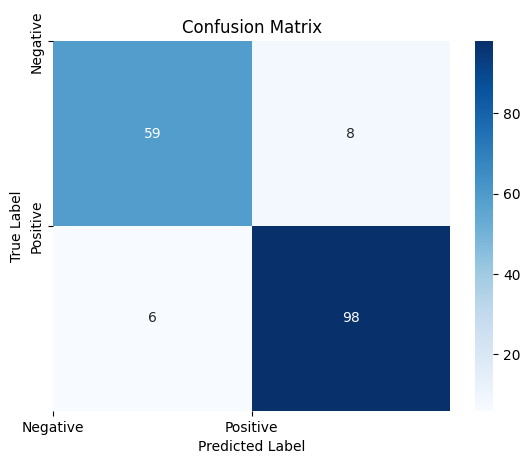

In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Creating a confusion matrix
matrix_c= confusion_matrix(Y_test, X_test_prediction)
a=pd.crosstab(Y_test, X_test_prediction)
print(a)
#print(matrix_c)
pd.crosstab(Y_test, X_test_prediction)
# Plotting the confusion matrix using seaborn
sns.heatmap(matrix_c, annot=True, cmap="Blues", fmt="d")

# Adding labels, title and ticks to the plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks([0,1],["Negative", "Positive"])
plt.yticks([0,1],["Negative", "Positive"])
plt.show()

In [ ]:
#prediction of the system using existing data

input_data = (13.49,22.3,86.91,561,0.08752,0.07698,0.04751,0.03384,0.1809,0.05718,0.2338,1.353,1.735,20.2,0.004455,0.01382,0.02095,0.01184,0.01641,0.001956,15.15,31.82,99,698.8,0.1162,0.1711,0.2282,0.1282,0.2871,0.06917)
# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')



[1]
The Breast Cancer is Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
#prediction of the system using new data
input_data = (12.49,11.3,89.91,564,0.08752,0.02698,0.05221,0.04389,0.1459,0.08818,0.2938,1.953,1.635,22.2,0.003455,0.01282,0.01095,0.02184,0.02641,0.001856,15.25,30.82,98,688.8,0.1262,0.1811,0.2182,0.1182,0.1871,0.07917)
# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')



[0]
The Breast cancer is Malignant


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


breast cancer detection using **deeplearning**

In [ ]:
#seperate the train and test data
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
#print the number of columns and rows in training and testing data
print(x.shape, X_train1.shape, X_test1.shape)

(569, 30) (455, 30) (114, 30)


In [ ]:
#standardise the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train1)

X_test_std = scaler.transform(X_test1)

Building neural network

In [ ]:
#for creating neural network we want to import two libraries (tensorflow and keras)
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras


In [ ]:
# setting up the layers of Neural Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(30,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30)                0         
                                                                 
 dense (Dense)               (None, 20)                620       
                                                                 
 dense_1 (Dense)             (None, 2)                 42        
                                                                 
Total params: 662
Trainable params: 662
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# training the Meural Network

history = model.fit(X_train_std, Y_train1, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 0s 15ms/step - loss: 0.1527 - accuracy: 0.9633 - val_loss: 0.1536 - val_accuracy: 0.9565
Epoch 2/10
13/13 [==============================] - 0s 8ms/step - loss: 0.1433 - accuracy: 0.9682 - val_loss: 0.1466 - val_accuracy: 0.9565
Epoch 3/10
13/13 [==============================] - 0s 7ms/step - loss: 0.1349 - accuracy: 0.9707 - val_loss: 0.1405 - val_accuracy: 0.9565
Epoch 4/10
13/13 [==============================] - 0s 7ms/step - loss: 0.1282 - accuracy: 0.9707 - val_loss: 0.1341 - val_accuracy: 0.9565
Epoch 5/10
13/13 [==============================] - 0s 8ms/step - loss: 0.1217 - accuracy: 0.9756 - val_loss: 0.1295 - val_accuracy: 0.9565
Epoch 6/10
13/13 [==============================] - 0s 8ms/step - loss: 0.1162 - accuracy: 0.9756 - val_loss: 0.1251 - val_accuracy: 0.9565
Epoch 7/10
13/13 [==============================] - 0s 9ms/step - loss: 0.1113 - accuracy: 0.9756 - val_loss: 0.1210 - val_accuracy: 0.9565
Epoch 8/10
13/13 [=

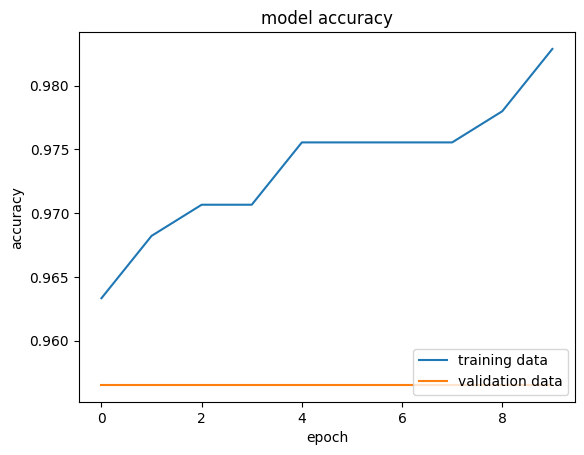

In [ ]:
#visualizing accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

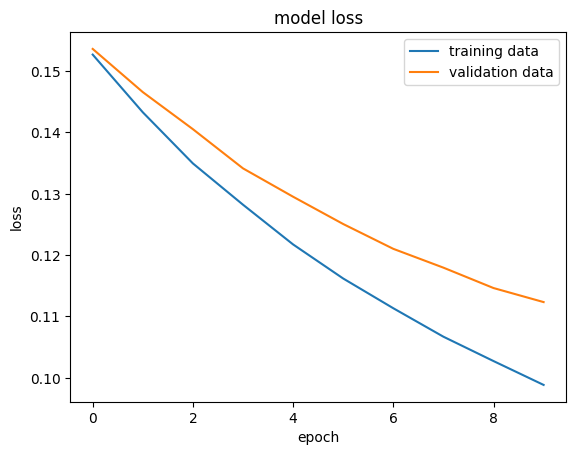

In [ ]:
#visualization of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [ ]:
#accuracy value of the model test data
loss,accuracy = model.evaluate(X_test_std, Y_test1)
print(accuracy)
print(loss)

4/4 [==============================] - 0s 4ms/step - loss: 0.1033 - accuracy: 0.9649
0.9649122953414917
0.10327748954296112


In [ ]:
#first value of the stad data
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [ ]:
Y_pred = model.predict(X_test_std)
print(Y_pred.shape)
print(Y_pred[0])

4/4 [==============================] - 0s 3ms/step
(114, 2)
[0.15128309 0.7906538 ]


In [ ]:
print(Y_pred)

[[0.15128309 0.7906538 ]
 [0.41594902 0.44202855]
 [0.00532456 0.8868491 ]
 [0.99931574 0.01059477]
 [0.5054613  0.5133097 ]
 [0.98996437 0.02002643]
 [0.12490404 0.58956075]
 [0.0191887  0.85073805]
 [0.10436656 0.7700387 ]
 [0.11572397 0.787466  ]
 [0.39712918 0.46311623]
 [0.04652546 0.7491452 ]
 [0.06494273 0.51910216]
 [0.14035517 0.57868505]
 [0.02698579 0.81834805]
 [0.92347246 0.17704095]
 [0.0322332  0.8767801 ]
 [0.05402632 0.9253959 ]
 [0.06046085 0.89491993]
 [0.9845856  0.08038914]
 [0.02127878 0.9632458 ]
 [0.0261774  0.89854115]
 [0.07865748 0.93849707]
 [0.02262283 0.86582345]
 [0.14047295 0.69338983]
 [0.9507979  0.1111899 ]
 [0.12598121 0.6919009 ]
 [0.38007408 0.53127694]
 [0.9281096  0.21046619]
 [0.9714771  0.08430895]
 [0.25480574 0.8221863 ]
 [0.07599987 0.7337658 ]
 [0.07405734 0.88356405]
 [0.99911624 0.00764528]
 [0.97861075 0.04278944]
 [0.23594518 0.92660445]
 [0.02354972 0.93074626]
 [0.21128985 0.6936248 ]
 [0.01265768 0.88660914]
 [0.07066576 0.78208494]


In [ ]:
# converting the prediction probability to class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]


In [ ]:
#building the predictive system
input_data = (15.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 [==============================] - 0s 23ms/step
[[0.02898783 0.77635354]]
[1]
The tumor is Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
